# Initial Explonatory Analysis

The Energy Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. As of June 2018, the database includes around 28,500 power plants from 164 countries. It will be continuously updated as data becomes available. The most recent release of the Global Power Plant Database 1.1 includes the addition of two countries (China and Fiji), over 3,000 power plants, and nearly 1300 gigawatts of power capacity. We highly recommend using version 1.1, available online as of June 2018.

- Data source: http://datasets.wri.org/dataset/globalpowerplantdatabase
- Technology: Python


- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [4]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `fuel1` (text): energy source used in electricity generation or export
- `fuel2` (text): energy source used in electricity generation or export
- `fuel3` (text): energy source used in electricity generation or export
- `fuel4` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013 
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015 
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `estimated_generation_gwh` (number): estimated annual electricity generation in gigawatt-hours for the year 2014 (see [0])

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# The code was removed by Watson Studio for sharing.

First 5 rows in dataset:

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN


Information about data cols. This output shows that a data has many missing values. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28664 entries, 0 to 28663
Data columns (total 22 columns):
country                     28664 non-null object
country_long                28664 non-null object
name                        28644 non-null object
gppd_idnr                   28664 non-null object
capacity_mw                 28664 non-null float64
latitude                    28664 non-null float64
longitude                   28664 non-null float64
fuel1                       28661 non-null object
fuel2                       1705 non-null object
fuel3                       296 non-null object
fuel4                       108 non-null object
commissioning_year          14952 non-null float64
owner                       18093 non-null object
source                      28664 non-null object
url                         28664 non-null object
geolocation_source          28243 non-null object
year_of_capacity_data       16145 non-null float64
generation_gwh_2013         439 non-null 

Descriptive statistics for dataset. According to the data, data leaks did not found.

In [17]:
pd.concat([df.describe().T,
                      df.median().rename('median'),
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt')
                     ], axis=1).T

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
count,28664.000000,28664.000000,2.866400e+04,14952.000000,16145.000000,439.000000,455.000000,958.000000,8326.000000,27536.000000
mean,186.097600,68.817502,9.925621e+01,1994.698521,2016.035367,2339.270238,2622.049124,1859.660249,532.668481,807.796919
std,523.027253,3610.172087,1.092781e+04,23.406231,1.258145,4384.011370,4138.194312,3965.618811,1935.490760,2687.873796
min,1.000000,-77.847000,-1.799777e+02,1896.000000,2000.000000,0.000000,0.000000,0.000000,-768.620000,0.000000
25%,4.795850,28.010225,-7.905748e+01,1985.000000,2016.000000,226.735625,253.466300,57.898941,3.197500,8.099628
50%,18.640000,39.950000,-3.928400e+00,2004.000000,2016.000000,731.334950,1015.676100,468.989500,20.354000,44.796959
75%,99.200000,46.980275,2.100702e+01,2012.000000,2016.000000,2636.217675,3170.871000,2152.211500,176.508999,293.907237
max,22500.000000,415750.000000,1.075744e+06,2018.000000,2018.000000,50834.000000,28127.000000,59546.865000,32377.477000,92268.763466
median,18.640000,39.950000,-3.928400e+00,2004.000000,2016.000000,731.334950,1015.676100,468.989500,20.354000,44.796959
skew,8.437356,100.542125,9.772897e+01,-1.572997,-8.197518,5.126256,3.085243,6.202689,6.560522,8.164776


Shape of the data.

In [6]:
df.shape

(28664, 22)

According to the table above many rows have NaN values. Let's find out cols with NaN values

In [7]:
cols = df.columns[df.isnull().any().values]
cols

Index(['name', 'fuel1', 'fuel2', 'fuel3', 'fuel4', 'commissioning_year',
       'owner', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'estimated_generation_gwh'],
      dtype='object')

So data columns have missing falues. According to plot below namem

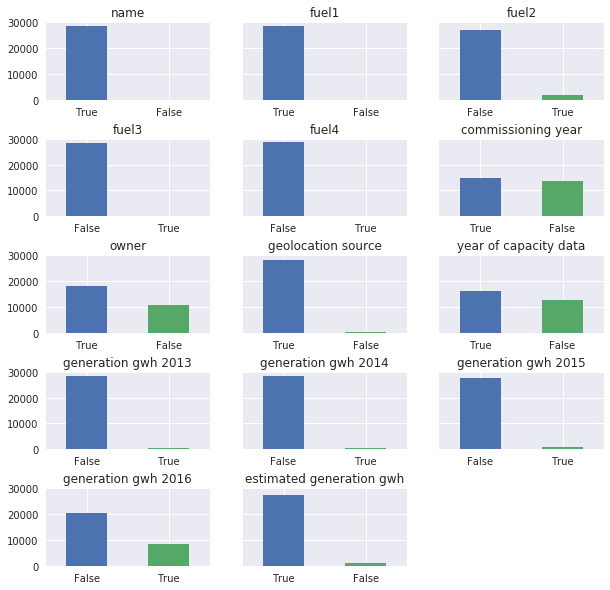

In [8]:
fig, axes = plt.subplots(5, 3, figsize=(10,10))
axes = axes.reshape(15,1)
fig.delaxes(axes[-1][0])
for i, col in enumerate(cols):
    current_ax = axes[i][0]
    df[col].notna().value_counts().plot(kind='bar', ax=current_ax, figsize=(10,10), sort_columns=True)
    current_ax.set_title(col.replace("_", " "))
    current_ax.set_ylim(0,30000)
    if (i+1) % 3 == 1:
        current_ax.set_yticklabels([0, 10000, 20000, 30000])
    else:
        current_ax.set_yticklabels([])
    current_ax.set_xticklabels(current_ax.get_xticklabels(), rotation=0)
    current_ax.set_xticklabels(current_ax.get_xticklabels())
plt.subplots_adjust(hspace=0.5)

Correlation matrix. 
 - Goal of the research is prediction generation gwh of the power plant so I discover most correlated features to generation. It was capacity. Features generation_gwh_2013, generation_gwh_2014,	generation_gwh_2015, generation_gwh_2016, estimated_generation_gwh will be presented as depended values in the future.
 - Location (latitude, longitude) does not influence to electricity generation.
 - Each generation year has high correlation with each other so high outliers in generation were not revealed
 - Commissioning year has not high correlation with generation value so modern technologies do not influence significatly to improve generation value.

In [9]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
capacity_mw,1.000000,-0.003177,-0.001953,0.014130,-0.000657,0.887546,0.834235,0.781531,0.866208,0.909036
latitude,-0.003177,1.000000,0.990304,-0.192670,-0.021193,0.025631,0.176128,0.201377,-0.031809,-0.002826
longitude,-0.001953,0.990304,1.000000,0.061198,-0.232530,-0.009714,-0.063284,0.186944,0.061465,-0.001687
commissioning_year,0.014130,-0.192670,0.061198,1.000000,0.192760,0.142839,0.129910,0.199157,-0.054859,0.000924
year_of_capacity_data,-0.000657,-0.021193,-0.232530,0.192760,1.000000,NaN,NaN,0.255699,NaN,0.004648
generation_gwh_2013,0.887546,0.025631,-0.009714,0.142839,NaN,1.000000,0.968824,0.908226,NaN,0.988231
generation_gwh_2014,0.834235,0.176128,-0.063284,0.129910,NaN,0.968824,1.000000,0.961055,NaN,NaN
generation_gwh_2015,0.781531,0.201377,0.186944,0.199157,0.255699,0.908226,0.961055,1.000000,NaN,0.600522
generation_gwh_2016,0.866208,-0.031809,0.061465,-0.054859,NaN,NaN,NaN,NaN,1.000000,0.887455
estimated_generation_gwh,0.909036,-0.002826,-0.001687,0.000924,0.004648,0.988231,NaN,0.600522,0.887455,1.000000


Distribution of the numeric values in dataset. Commissioning year shows that most of the plants wa built in 2000's.

Insight's:
- Capacity distribtution shows that most of power plants has capacity between 0 and 20000. The mean was 186.0976 but median was 18.64 megawatt. Deviation also too big it will be good clean data using IQR
- Latidude distribution shows that many power plants is located nearby
- Longitude distribution shows that most of the power plants located on one longitude
- All generation value distrubution have same form but it quite difficult to interpret because of columns have so many missing values
- Commission year shows that more that 
- Year of capacity data shows tendency of growing creating power plants
- Year of capacity shows that most of the power plant shows up-to-date capacity

In [11]:
int_df = df.iloc[:,np.where(df.dtypes == np.float64)[0]]

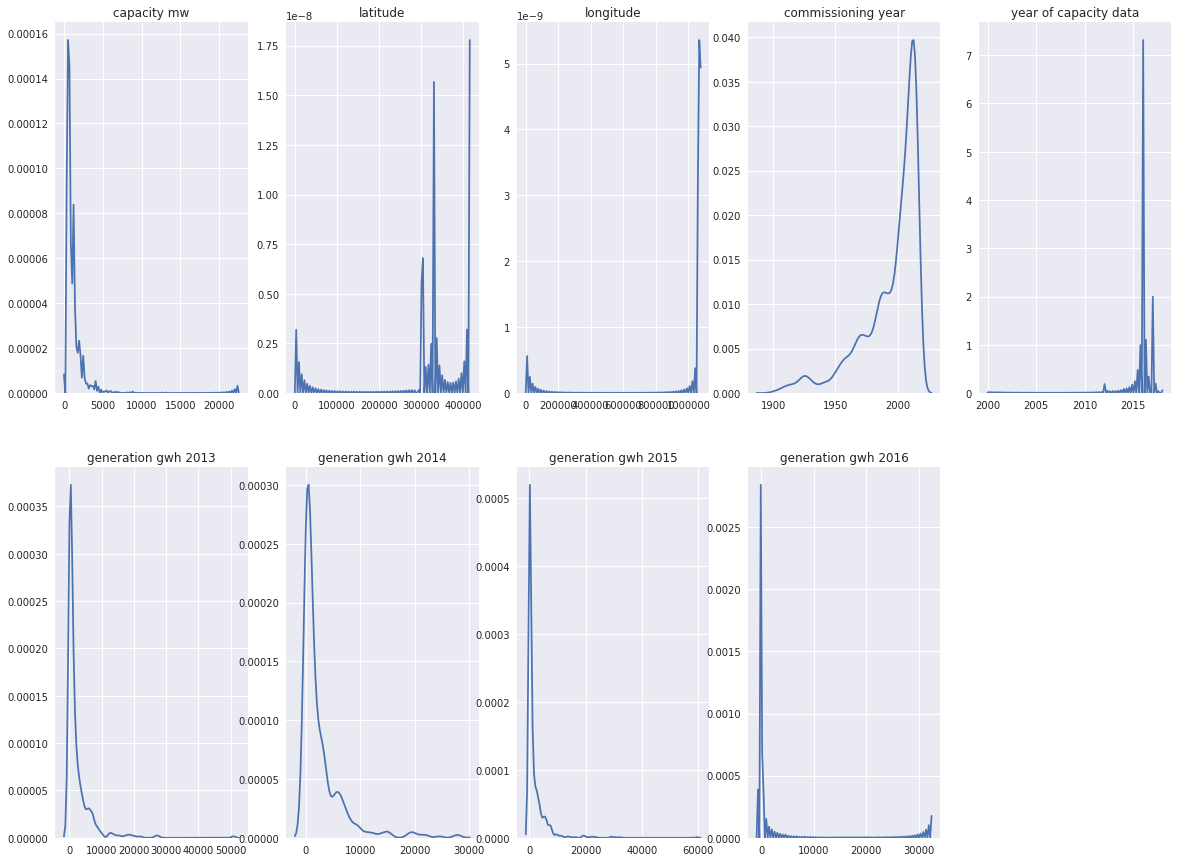

In [35]:
fig, axes = plt.subplots(2, 5, figsize=(20, 15))
fig.delaxes(axes.flatten()[-1])
for col, ax in zip(int_df.columns, axes.flatten()[:-1]):
    sns.kdeplot(int_df[col], ax = ax)
    ax.set_title(col.replace("_", " "))
    ax.get_legend().remove()

In [151]:
def generate_fuel_plot(mat, ax):
    cols = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'estimated_generation_gwh'] 
    m = mat[cols].T
    res = m.sum() 
    ax = sns.barplot(res, m.columns, ax=ax)
    ax.grid()
    ax.plot(np.repeat(np.mean(res), len(res)), range(len(res)), "-", linewidth=5, color='blue')
    ax.plot(np.repeat(np.median(res), len(res)), range(len(res)), "-", linewidth=5, color='red')
    plt.draw()
    
def print_iqr(mat):
    cols = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'estimated_generation_gwh'] 
    res = mat[cols].T.sum()
    Q1 = res.quantile(0.10)
    Q3 = res.quantile(0.90)
    IQR = Q3 - Q1
    print("IQR = ({}, {}) or {}".format(Q1, Q3, IQR))
    

Let's explore fuel of the station

In [143]:
cols = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'estimated_generation_gwh', 'capacity_mw']
fuel1_matrix = df.groupby('fuel1').count()[cols]
fuel2_matrix = df.groupby('fuel2').count()[cols]
fuel3_matrix = df.groupby('fuel3').count()[cols]
fuel4_matrix = df.groupby('fuel4').count()[cols]

- The most popular fuels were gas, hydro and wind
- The most unpopular fuel were storage, petcoke, cogeneration, nuclear, geothermal, wave, other

*Note red = median, blue = mean*

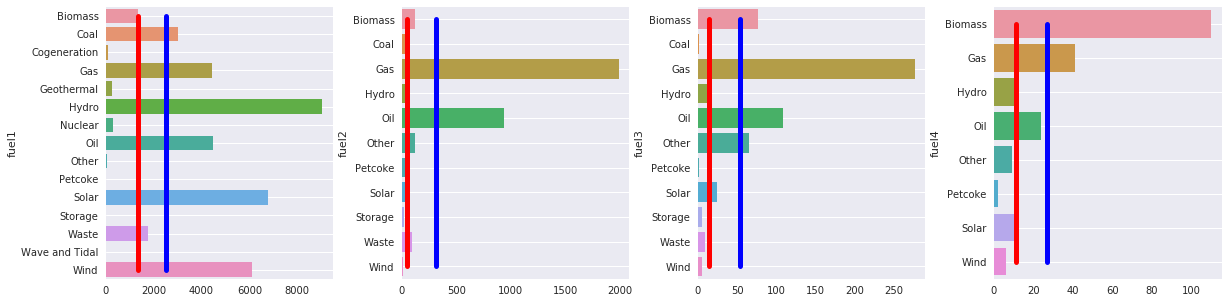

In [150]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))
generate_fuel_plot(fuel1_matrix, axes[0])
generate_fuel_plot(fuel2_matrix, axes[1])
generate_fuel_plot(fuel3_matrix, axes[2])
generate_fuel_plot(fuel4_matrix, axes[3])
plt.subplots_adjust(wspace=0.3)

It was detected diffrent outliers in fuel sample. Let's caclucate IQR, it would be used in feauture creation and filtering.
- fuel1 has the biggest range of power stations, other has less range than others.

In [153]:
print_iqr(fuel1_matrix)
print_iqr(fuel2_matrix)
print_iqr(fuel3_matrix)
print_iqr(fuel4_matrix)

IQR = (24.400000000000002, 6506.4) or 6482.0
IQR = (23.0, 941.0) or 918.0
IQR = (2.0, 108.0) or 106.0
IQR = (4.8, 61.69999999999999) or 56.89999999999999


Distribution of power station in diffrent countries

- USA, GBR, CHN, FRA, BRA have the biggest count of the power plants.
- GBR and FRA has the most dense covererage of power plants.

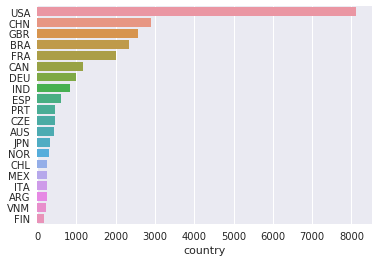

In [221]:
countries = df['country'].value_counts()[:20]
sns.barplot(countries, countries.index)

Visualizing power plants:

In [222]:
import plotly
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

plot_data = df.sample(1000)

data = [ go.Scattergeo(
        lon = plot_data['longitude'],
        lat = plot_data['latitude'],
        text = "",
        mode = 'markers',
        marker = dict( 
            size = 1, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            cmin = 0,
            color = plot_data['fuel1'],
            cmax = list(range(0,100)),
            colorbar=dict(
                title="Incoming flights<br>February 2011"
            )
        ))]

layout = dict(
        width=1000,
        height=750,
        title = 'Locations'
    )

fig = go.Figure(data=data, layout=layout )
plotly.offline.iplot(fig)

Let's check hypotesis that dataset can be used as time series. To check it needs to be visualized each sequence of energy generation.

In [70]:
generation_cols = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016']

for shift in range(len(generation_cols)-1):
    cum = []
    prev_state = []
    prev_cols = []
    for i, col in enumerate(np.array(generation_cols)[shift:]):
        cum.append(col)
        rows = df[cum].notna().apply(lambda x: np.all(x), axis=1)
        print("Rows for time series ready: ", np.nansum(rows), cum, " Deviation: ", np.nanstd(df[rows][cum].values))
        print("----------------------------------")
        prev_state = rows
        prev_cols = cum.copy()
    print("shift: ", shift)

Rows for time series ready:  439 ['generation_gwh_2013']  Deviation:  4379.01534355
----------------------------------
Rows for time series ready:  383 ['generation_gwh_2013', 'generation_gwh_2014']  Deviation:  3937.35162487
----------------------------------
Rows for time series ready:  383 ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015']  Deviation:  4076.56951557
----------------------------------
Rows for time series ready:  0 ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016']  Deviation:  nan
----------------------------------
shift:  0
Rows for time series ready:  455 ['generation_gwh_2014']  Deviation:  4133.6443447
----------------------------------
Rows for time series ready:  400 ['generation_gwh_2014', 'generation_gwh_2015']  Deviation:  4143.38737867
----------------------------------
Rows for time series ready:  0 ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016']  Deviation:  nan
----------